# Data Warehouse Assignment

## Lab 4

```
Gyanendra Kr Shukla
191112040
CSE-1
```

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
titanic_df = pd.read_excel('titanic.xls')
print("Describing the dataframe:")
titanic_df.describe()

Describing the dataframe:


,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [36]:
print("First 5 rows of the dataframe:")
titanic_df.head()

First 5 rows of the dataframe:


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


### Q1. WAP to compute following on the titanic dataset
1. Counting missing values in each column
2. Removing rows/attributes with missing values and calculating the ratio with respect to original data
3. Replacing missing values of the age attribute with
    1. Mean
    2. Median

In [37]:
# Counting missing values in each column
nas = {}
for series in titanic_df:
    na = 0
    for value in titanic_df[series]:
        # print(value, end=', ')
        if pd.isnull(value):
            na += 1
    nas[series] = na
null_vals = pd.Series(nas, name="No. of null values")



In [38]:
# Removing rows with missing values
titanic_row_null_removed = titanic_df.copy()
null = []
for row in titanic_df.itertuples():
    for val in list(row)[1:]:
        if pd.isnull(val):
            null.append(row[0])
            break

for row in null:
    titanic_row_null_removed.drop(row, inplace=True)
print(f"Ratio of original with null removed dataframe: {titanic_row_null_removed.shape[0]/titanic_df.shape[0]}")


Ratio of original with null removed dataframe: 0.7967914438502673


In [39]:
# removing columns with missing values
titanic_col_null_removed = titanic_df.copy()
null = []
for col in titanic_df.columns:
    for val in titanic_df[col].tolist():
        if pd.isnull(val):
            null.append(col)
            break
for col in null:
    titanic_col_null_removed.drop(col, axis=1, inplace=True)
print(f"Ratio of original with null removed dataframe: {titanic_col_null_removed.shape[1]/titanic_df.shape[1]}")

Ratio of original with null removed dataframe: 0.7


In [40]:
# replacing missing values of attribute with mean
titanic_df['meanfilled-age'] = titanic_df['age'].fillna(titanic_df['age'].mean())

titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,meanfilled-age
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,29.881135
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,12.883199
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,22.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,29.881135
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,35.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,80.000000


In [41]:
# replacing missing values of attribute with median
titanic_df['medianfilled-age'] = titanic_df['age'].fillna(titanic_df['age'].median())

titanic_df.describe()

,pclass,survived,age,sibsp,parch,fare,meanfilled-age,medianfilled-age
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,29.881135,29.503183
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,12.883199,12.905246
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.166700,0.166700
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,22.000000,22.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,29.881135,28.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,35.000000,35.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,80.000000,80.000000


## Q2. WAP to perform transformation of data on age attribute of Titanic dataset using Binning
1. With equal width bins using K=25, using mean (you may fill zero value to balance last bin)
2. With equal frequency bins of size 100 using mean (you may fill zero value to balance last bin) 

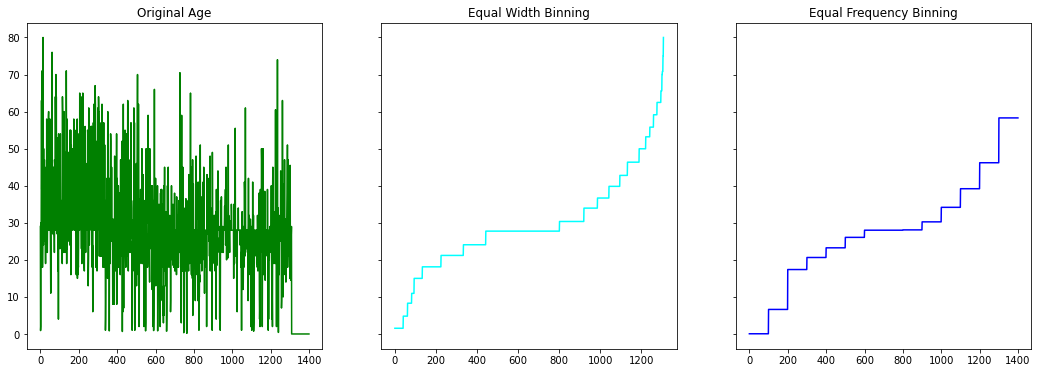

In [47]:
def binning_equal_width(ageser, k):
    w = (max(ageser) - min(ageser))/k
    bins = [min(ageser) + i*w for i in range(k+1)]
    ret = []
    for i in range(0, k):
        curr = []
        for j in ageser:
            if j >= bins[i] and j <= bins[i+1]:
                curr.append(j)
        # mean of curr
        ret+=[np.mean(curr)]*len(curr)
    return ret


def binning_equal_frequency(age, size):
    while len(age) % size != 0:
        age.append(0)
    age = sorted(age)
    ret = []
    for i in range(0, len(age), size):
        ret+=[np.mean(age[i:i+size])]*size
    return ret

def binning(series):
    equalWidth = binning_equal_width(series, 25)
    equalFrequency = binning_equal_frequency(series, 100)
    _, axs = plt.subplots(1,3, figsize=(18,6), sharey=True)
    axs[0].plot(series, label = 'Original Age', color='green')
    axs[0].set_title('Original Age')
    axs[1].plot(equalWidth, label = 'Equal Width Binning', color = 'cyan')
    axs[1].set_title('Equal Width Binning')
    axs[2].plot(equalFrequency, label = 'Equal Frequency Binning', color = 'blue')
    axs[2].set_title('Equal Frequency Binning')
    plt.show()

binning(titanic_df['medianfilled-age'].tolist())


## Q3. Performing Chi-Square test on the titanic dataset (and show the contingency table)

1. Pclass & Survived (fill missing values with highest frequency category, if any)
2. Pclass & sex (fill missing values with highest frequency category, if any)
3. Plass & embarked (fill missing values with highest frequency category, if any) 

In [55]:
import seaborn as sns
from scipy.stats.distributions import chi2
def chiSquareCalc(x, y):
    x = x.fillna(x.mode()[0])
    y = y.fillna(y.mode()[0])
    
    table = {}
    for i in range(len(x)):
        if x[i] in table:
            if y[i] in table[x[i]]:
                table[x[i]][y[i]] += 1
            else:
                table[x[i]][y[i]] = 1
        else:
            table[x[i]] = {}
            table[x[i]][y[i]] = 1
    df = pd.DataFrame(table)
    df['Sum(row)'] = df.sum(axis=1)
    df.loc['Sum(col)'] = df.sum()
    df.columns.name = x.name
    df.index.name = y.name

    df_exp = df.copy()

    for i in range(len(df.columns)-1):
        df_exp.iloc[i, :-1] = df_exp.iloc[-1,:-1]*df_exp.iloc[i, -1]/df_exp.iloc[-1,-1]

    # Plot everything
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.heatmap(df.iloc[:-1, :-1], annot=True, fmt='d')
    plt.title('Contingency Table')
    plt.subplot(1,2,2)
    sns.heatmap(df_exp.iloc[:-1, :-1], annot=True, fmt='g')
    plt.title('Expected Value Table')
    plt.tight_layout()
    plt.show()

    chiSq = np.sum(np.sum(((df.iloc[:-1, :-1] - df_exp.iloc[:-1, :-1])**2/df_exp.iloc[:-1, :-1])))
    print("The chi-square value:", chiSq)
    rows = x.unique()
    cols = y.unique()
    dof = (len(rows)-1)*(len(cols)-1)
    print("The degree of freedom:", dof)
    p = chi2.sf(chiSq, dof)
    print("The p-value:", p)


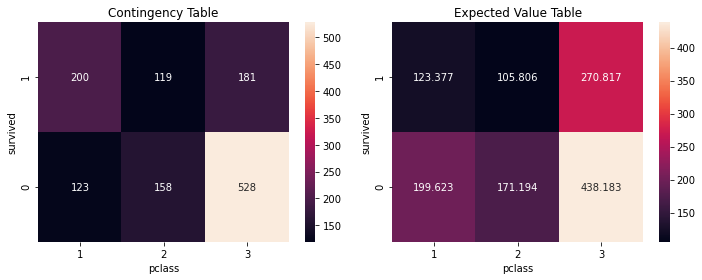

The chi-square value: 127.85915643930326
The degree of freedom: 2
The p-value: 1.7208259588256175e-28


In [56]:
chiSquareCalc(titanic_df['pclass'], titanic_df['survived'])

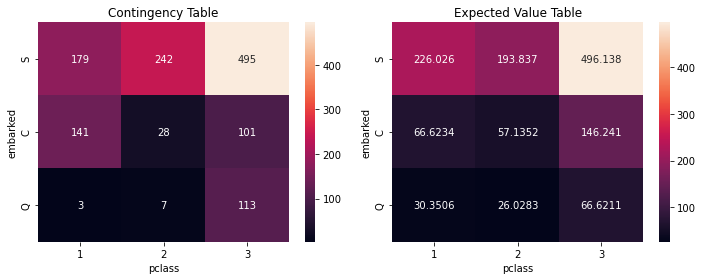

The chi-square value: 204.48431967559742
The degree of freedom: 4
The p-value: 4.0799162291284984e-43


In [54]:
chiSquareCalc(titanic_df['pclass'], titanic_df['embarked'])

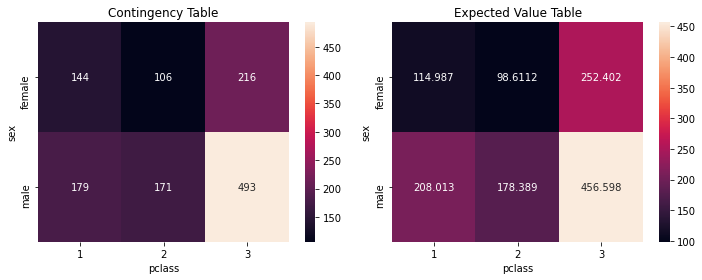

The chi-square value: 20.378781205085584
The degree of freedom: 2
The p-value: 3.7566772719164106e-05


In [53]:
chiSquareCalc(titanic_df['pclass'], titanic_df['sex'])

## Q4. Perform correlation analysis
1. Age & Fare (first fill missing values using mean, if any)
2. Age & sibsp (first fill missing values using mean, if any) 

In [57]:
def correlation(x, y):
    x = x.fillna(x.mean())
    y = y.fillna(y.mean())

    r = ((x-x.mean())*(y-y.mean())).sum() / ((x.size-1)*x.std()*y.std())
    plt.scatter(x, y, c=np.random.rand(x.size))
    plt.title("Correlation: "+str(r), fontsize=15)
    plt.show()

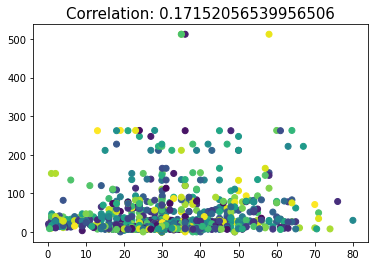

In [59]:
correlation(titanic_df['age'], titanic_df['fare'])

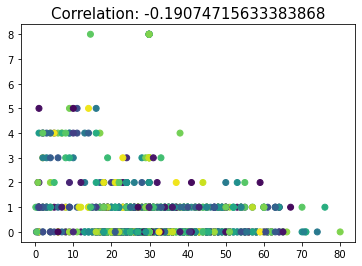

In [61]:
correlation(titanic_df['age'], titanic_df['sibsp'])